In [2]:
import numpy as np
import matplotlib.pyplot as plt

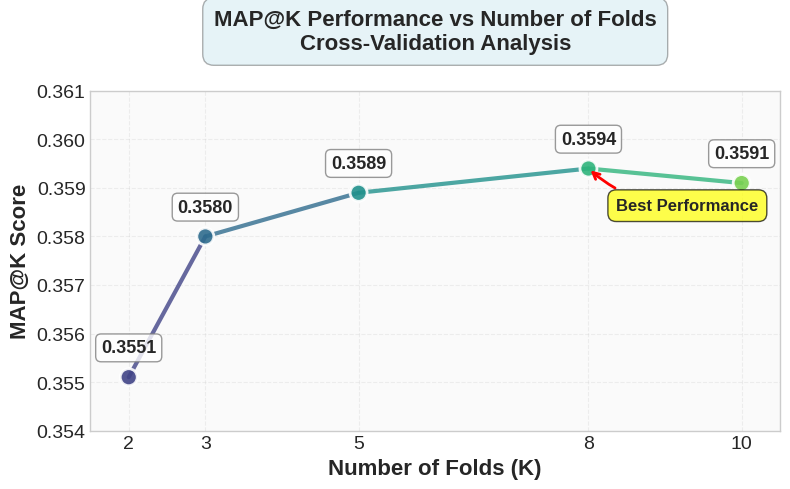

圖表已保存為:
1. mapk_vs_num_folds_enhanced.png (高解析度PNG)
2. mapk_vs_num_folds_analysis.pdf (精美PDF圖表)


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.backends.backend_pdf import PdfPages

# 設置中文字體支持和整體風格
plt.rcParams['font.family'] = ['DejaVu Sans', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.style.use('seaborn-v0_8-whitegrid')

num_fold_list = np.array([2, 3, 5, 8, 10])
mapK = np.array([0.3551, 0.3580, 0.3589, 0.3594, 0.3591]) 

# 創建更精美的圖表
fig, ax = plt.subplots(figsize=(8, 5))

# 主要曲線 - 使用漸變色效果
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(num_fold_list)))
for i in range(len(num_fold_list)-1):
    ax.plot(num_fold_list[i:i+2], mapK[i:i+2], 
            color=colors[i], linewidth=3, alpha=0.8)

# 數據點標記
scatter = ax.scatter(num_fold_list, mapK, 
                    c=colors, s=150, alpha=0.9, 
                    edgecolors='white', linewidth=2, 
                    zorder=5)

# 添加數值標註
for i, (x, y) in enumerate(zip(num_fold_list, mapK)):
    ax.annotate(f'{y:.4f}', 
                (x, y), 
                xytext=(0, 15), 
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=13, fontweight='bold',
                bbox=dict(boxstyle='round,pad=0.3', 
                         facecolor='white', 
                         edgecolor='gray', 
                         alpha=0.8))

# 美化標題和標籤
ax.set_title('MAP@K Performance vs Number of Folds\nCross-Validation Analysis', 
             fontsize=16, fontweight='bold', pad=30,
             bbox=dict(boxstyle='round,pad=0.5', 
                      facecolor='lightblue', 
                      alpha=0.3))

ax.set_xlabel('Number of Folds (K)', fontsize=16, fontweight='bold')
ax.set_ylabel('MAP@K Score', fontsize=16, fontweight='bold')

# 設置坐標軸
ax.set_xticks(num_fold_list)
ax.set_xlim(1.5, 10.5)
ax.set_ylim(0.354, 0.361)

# 設置刻度字體大小
ax.tick_params(axis='both', which='major', labelsize=14)

# 美化網格
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
ax.set_facecolor('#fafafa')

# 添加最佳點標示
best_idx = np.argmax(mapK)
ax.annotate('Best Performance', 
            xy=(num_fold_list[best_idx], mapK[best_idx]),
            xytext=(20, -30), textcoords='offset points',
            fontsize=12, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.5', 
                     facecolor='yellow', alpha=0.7),
            arrowprops=dict(arrowstyle='->', 
                          connectionstyle='arc3,rad=-0.2',
                          color='red', lw=2),
            zorder=10)

plt.tight_layout()

# 保存為高質量PNG和PDF
plt.savefig('mapk_vs_num_folds_enhanced.png', dpi=300, bbox_inches='tight')

# 保存為PDF (只包含主圖表)
with PdfPages('mapk_vs_num_folds_analysis.pdf') as pdf:
    pdf.savefig(fig, bbox_inches='tight', dpi=300)

plt.show()

print("圖表已保存為:")
print("1. mapk_vs_num_folds_enhanced.png (高解析度PNG)")
print("2. mapk_vs_num_folds_analysis.pdf (精美PDF圖表)")